<a href="https://colab.research.google.com/github/dklpp/tf-developer/blob/main/C2_W2_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Performance

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-11-04 16:04:40--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   188MB/s    in 0.3s    

2023-11-04 16:04:41 (188 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 22s - loss: 0.6905 - accuracy: 0.5165 - val_loss: 0.6839 - val_accuracy: 0.4990 - 22s/epoch - 220ms/step
Epoch 2/20
100/100 - 7s - loss: 0.6759 - accuracy: 0.5845 - val_loss: 0.6757 - val_accuracy: 0.5330 - 7s/epoch - 74ms/step
Epoch 3/20
100/100 - 5s - loss: 0.6493 - accuracy: 0.6230 - val_loss: 0.6779 - val_accuracy: 0.5710 - 5s/epoch - 48ms/step
Epoch 4/20
100/100 - 6s - loss: 0.6169 - accuracy: 0.6595 - val_loss: 0.6238 - val_accuracy: 0.6400 - 6s/epoch - 56ms/step
Epoch 5/20
100/100 - 5s - loss: 0.5974 - accuracy: 0.6700 - val_loss: 0.5989 - val_accuracy: 0.6870 - 5s/epoch - 49ms/step
Epoch 6/20
100/100 - 7s - loss: 0.5641 - accuracy: 0.7030 - val_loss: 0.5986 - val_accuracy: 0.6850 - 7s/epoch - 74ms/step
Epoch 7/20
100/100 - 5s - loss: 0.5384 - accuracy: 0.7225 - val_loss: 0.5904 - val_accuracy: 0.6870 - 5s/epoch - 55ms/step
Epoch 8/20
100/100 - 6s - loss: 0.5190 - accuracy: 0.7480 - val_loss: 0.5791 - val_accuracy: 0.7110 - 6s/epoch - 57ms/step
Epoch 9/20
10

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

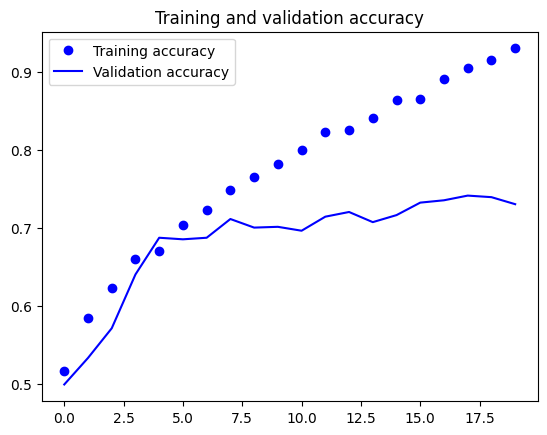

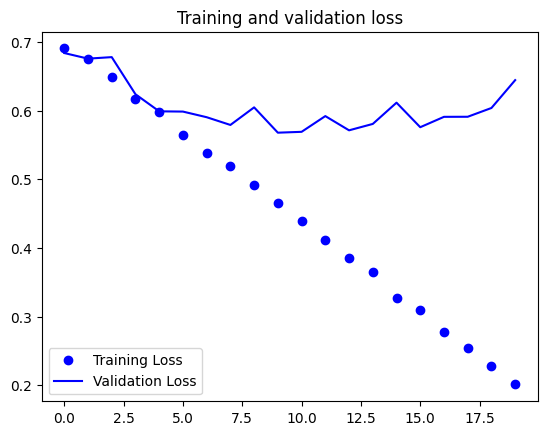

In [ ]:
plot_loss_acc(history)

# Data Augmentation
- rotation_range is a value in degrees (0–180) within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.
- horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 19s - loss: 0.6908 - accuracy: 0.5280 - val_loss: 0.6880 - val_accuracy: 0.5000 - 19s/epoch - 186ms/step
Epoch 2/20
100/100 - 16s - loss: 0.6846 - accuracy: 0.5410 - val_loss: 0.6674 - val_accuracy: 0.6090 - 16s/epoch - 164ms/step
Epoch 3/20
100/100 - 22s - loss: 0.6735 - accuracy: 0.5645 - val_loss: 0.6590 - val_accuracy: 0.6030 - 22s/epoch - 215ms/step
Epoch 4/20
100/100 - 15s - loss: 0.6690 - accuracy: 0.5830 - val_loss: 0.6424 - val_accuracy: 0.6250 - 15s/epoch - 153ms/step
Epoch 5/20
100/100 - 15s - loss: 0.6574 - accuracy: 0.5820 - val_loss: 0.6363 - val_accuracy: 0.6210 - 15s/epoch - 151ms/step
Epoch 6/20
100/100 - 16s - loss: 0.6489 - accuracy: 0.6015 - val_loss: 0.6482 - val_accuracy: 0.6070 - 16s/epoch - 162ms/step
Epoch 7/20
100/100 - 17s - loss: 0.6378 - accuracy: 0.6260 - val_loss: 0.5930 - val_accuracy: 0.6810 - 17s/epoch - 165ms/step
Epoch 8/20
100/100 - 17s - loss: 0.6228 - accuracy: 0.6400 - val_loss: 0.5918 - val_accuracy: 0.6750 - 17s/epoch - 169

- Training accuracies of first epochs are lower than with the version without data augmentation. That's because our dataset now is more diverse (more different images).
- Try with EPOCHS = 100+. Results should be good.

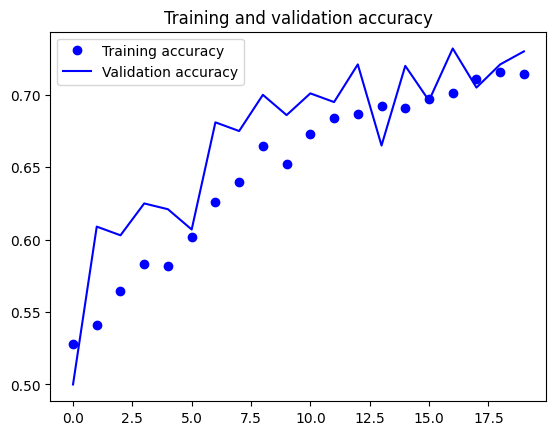

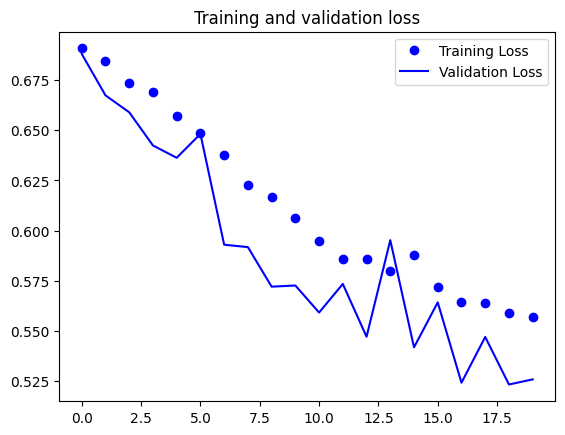

In [ ]:
plot_loss_acc(history_with_aug)